# 👶 Driver Age Analysis

In this notebook, we analyze how the average age of Formula 1 drivers has evolved over time, based on the historical data from the Kaggle F1 dataset (1950–2020).

In [2]:
# 📦 Required imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# 📁 Dataset path
DATA_DIR = Path("../../data/raw/rohanrao_formula-1-world-championship-1950-2020")

# 📂 Load required datasets
drivers = pd.read_csv(DATA_DIR / "drivers.csv", parse_dates=["dob"])
races = pd.read_csv(DATA_DIR / "races.csv")
results = pd.read_csv(DATA_DIR / "results.csv")

In [13]:
import sys
from pathlib import Path

# 🛠️ Add src directory to Python path
sys.path.append(str(Path("../../src")))

# 📥 Import the scoring function
from utils.scoring import normalize_points

In [14]:
# 🔗 Merge results with races to get the season year
results_year = results.merge(races[["raceId", "year"]], on="raceId")

# 🔗 Merge with drivers to get date of birth
df = results_year.merge(drivers[["driverId", "dob"]], on="driverId")

# 📅 Approximate race date as January 1st of each season
df["race_date"] = pd.to_datetime(df["year"].astype(str) + "-01-01")

# 🧮 Compute driver age in years at time of race
df["age"] = (df["race_date"] - df["dob"]).dt.days / 365.25

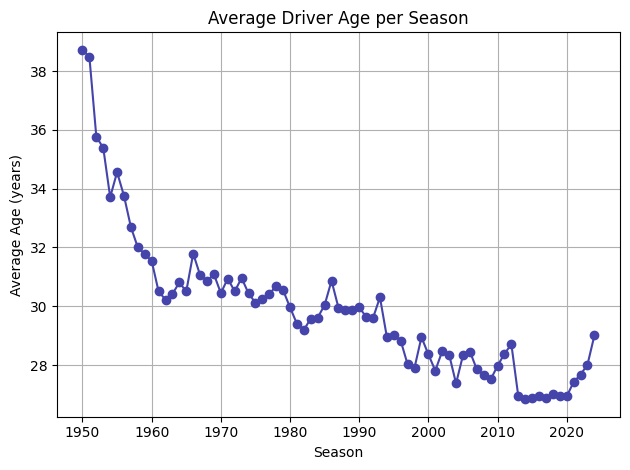

In [16]:
# 📉 Plot average driver age per season
avg_age_per_year.plot(marker="o", color="#4444aa")
plt.title("Average Driver Age per Season")
plt.xlabel("Season")
plt.ylabel("Average Age (years)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# 📊 Aggregate per driver per season
points_per_driver_season = df.groupby(["driverId", "year"]).agg({
    "points": "sum",
    "positionOrder": lambda x: (x == 1).sum(),  # Count wins
    "age": "mean",  # Average age during season
}).reset_index()

# 🏷️ Rename for clarity
points_per_driver_season.rename(columns={"positionOrder": "wins"}, inplace=True)

In [21]:
# ➕ Normalize points using external utility
from utils.scoring import normalize_points
points_per_driver_season["normalized_points"] = normalize_points(points_per_driver_season)

ValueError: No scoring system defined for year 2021

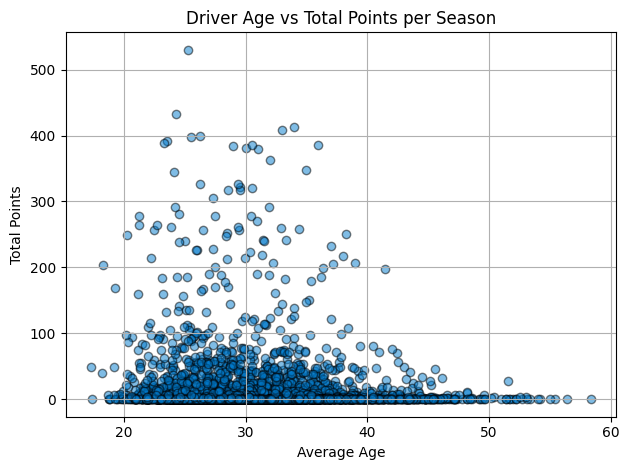

In [ ]:
# 📈 Age vs total points
plt.scatter(points_per_driver_season["age"], points_per_driver_season["points"], alpha=0.5, color="#007acc", edgecolors="k")
plt.title("Driver Age vs Total Points per Season")
plt.xlabel("Average Age")
plt.ylabel("Total Points")
plt.grid(True)
plt.tight_layout()
plt.show()

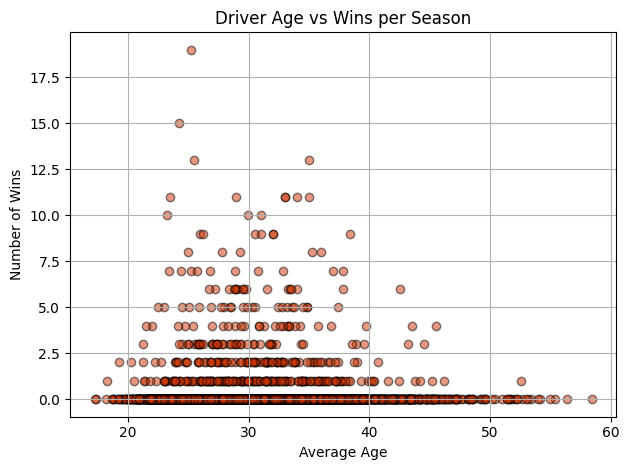

In [7]:
# 📈 Age vs wins
plt.scatter(points_per_driver_season["age"], points_per_driver_season["wins"], alpha=0.5, color="#cc3300", edgecolors="k")
plt.title("Driver Age vs Wins per Season")
plt.xlabel("Average Age")
plt.ylabel("Number of Wins")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# 📊 Pearson correlation
corr_points = points_per_driver_season[["age", "points"]].corr().iloc[0, 1]
corr_wins = points_per_driver_season[["age", "wins"]].corr().iloc[0, 1]

print(f"📌 Correlation between Age and Total Points: {corr_points:.3f}")
print(f"📌 Correlation between Age and Wins: {corr_wins:.3f}")

📌 Correlation between Age and Total Points: -0.099
📌 Correlation between Age and Wins: -0.032


In [9]:
# 🧱 Define age buckets
bins = [0, 25, 30, 35, 40, 100]
labels = ["<25", "25–30", "30–35", "35–40", "40+"]

points_per_driver_season["age_group"] = pd.cut(points_per_driver_season["age"], bins=bins, labels=labels)

C:\Users\lucaf\AppData\Local\Temp\ipykernel_14824\3562192845.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_points_by_age = points_per_driver_season.groupby("age_group")["points"].mean()


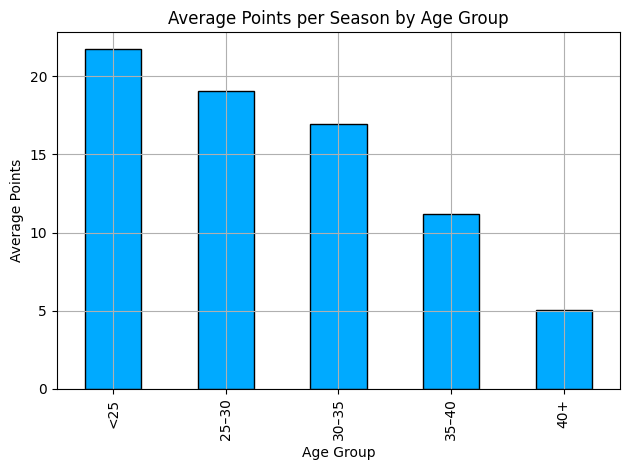

In [10]:
# 📊 Average points by age group
avg_points_by_age = points_per_driver_season.groupby("age_group")["points"].mean()

avg_points_by_age.plot(kind="bar", color="#00aaff", edgecolor="black")
plt.title("Average Points per Season by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Points")
plt.grid(True)
plt.tight_layout()
plt.show()